In [ ]:
!pip install pandas-datareader

In [1]:
# Importing libraries :
import statsmodels.api as sm
import pandas as pd                                    
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import datetime as dt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Initial and final date to retrieve data in between
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 30)

In [3]:
# Extracting data from yahoo finance website
df = pdr.get_data_yahoo("^NSEI", start,end)
df.head()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,5238.450195,5167.100098,5200.899902,5232.200195,0.0,5232.200195
2010-01-05,5288.350098,5242.399902,5277.149902,5277.899902,0.0,5277.899902
2010-01-06,5310.850098,5260.049805,5278.149902,5281.799805,0.0,5281.799805
2010-01-07,5302.549805,5244.750000,5281.799805,5263.100098,0.0,5263.100098
2010-01-08,5276.750000,5234.700195,5264.250000,5244.750000,0.0,5244.750000


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-24,12272.150391,12149.650391,12174.549805,12248.250000,593200.0,12248.250000
2020-01-27,12216.599609,12107.000000,12197.099609,12119.000000,441200.0,12119.000000
2020-01-28,12163.549805,12024.500000,12148.099609,12055.799805,478500.0,12055.799805
2020-01-29,12169.599609,12103.799805,12114.900391,12129.500000,514400.0,12129.500000
2020-01-30,12150.299805,12010.599609,12147.750000,12035.799805,538100.0,12035.799805


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2465.000000,2465.000000,2465.000000,2465.000000,2.465000e+03,2465.000000
mean,7838.235646,7749.915999,7800.067690,7794.158178,1.633425e+05,7794.158178
std,2244.143971,2233.210777,2241.784379,2238.482662,1.634086e+05,2238.482662
min,4623.149902,4531.149902,4623.149902,4544.200195,0.000000e+00,4544.200195
25%,5718.899902,5647.950195,5686.500000,5684.250000,0.000000e+00,5684.250000
50%,7862.549805,7759.899902,7816.549805,7795.750000,1.543000e+05,7795.750000
75%,9884.349609,9783.650391,9855.799805,9820.250000,2.188000e+05,9820.250000
max,12430.500000,12321.400391,12430.500000,12362.299805,1.414800e+06,12362.299805


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2010-01-04 to 2020-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2465 non-null   float64
 1   Low        2465 non-null   float64
 2   Open       2465 non-null   float64
 3   Close      2465 non-null   float64
 4   Volume     2465 non-null   float64
 5   Adj Close  2465 non-null   float64
dtypes: float64(6)
memory usage: 134.8 KB


In [7]:
df.index   

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30'],
              dtype='datetime64[ns]', name='Date', length=2465, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2010-01-04 to 2020-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2465 non-null   float64
 1   Low        2465 non-null   float64
 2   Open       2465 non-null   float64
 3   Close      2465 non-null   float64
 4   Volume     2465 non-null   float64
 5   Adj Close  2465 non-null   float64
dtypes: float64(6)
memory usage: 134.8 KB


In [9]:
data=df[['Adj Close']]
data.head()


,Adj Close
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000


Text(0, 0.5, "Stock's Closing price")

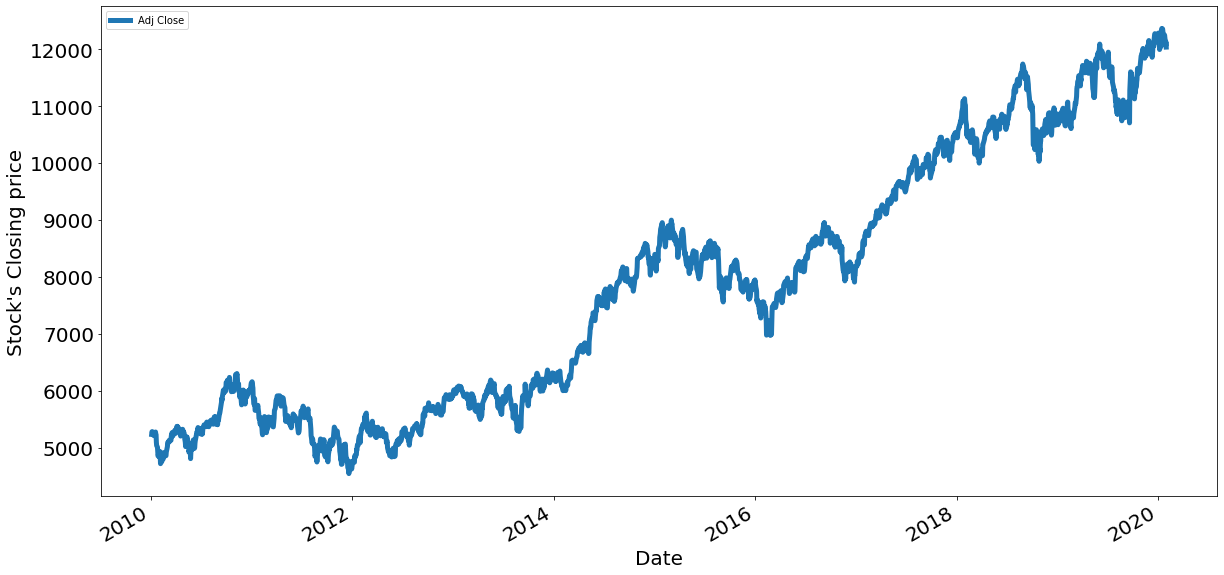

In [10]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock\'s Closing price',fontsize=20)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,2465.0,7794.158178,2238.482662,4544.200195,5684.25,7795.75,9820.25,12362.299805


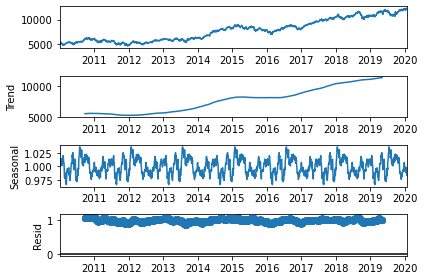

In [12]:
# Decomposition 
decomposition = sm.tsa.seasonal_decompose(data, model = 'multiplicative', period = 365)
fig = decomposition.plot()

fig.show()


In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:

adfuller_test(data)

ADF Test Statistic : -0.1828540593172433
p-value : 0.9405347467087437
#Lags Used : 1
Number of Observations Used : 2463
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
#Differencing
data['Adj Close First Difference'] = data - data.shift(1)

In [16]:
data.shift(1)

,Adj Close,Adj Close First Difference
Date,,
2010-01-04,NaN,NaN
2010-01-05,5232.200195,NaN
2010-01-06,5277.899902,45.699707
2010-01-07,5281.799805,3.899902
2010-01-08,5263.100098,-18.699707
...,...,...
2020-01-24,12180.349609,73.449219
2020-01-27,12248.250000,67.900391
2020-01-28,12119.000000,-129.250000


In [17]:
data['Seasonal First Difference']=data['Adj Close']-data['Adj Close'].shift(12)
data.head(15)


,Adj Close,Adj Close First Difference,Seasonal First Difference
Date,,,
2010-01-04,5232.200195,NaN,NaN
2010-01-05,5277.899902,45.699707,NaN
2010-01-06,5281.799805,3.899902,NaN
2010-01-07,5263.100098,-18.699707,NaN
2010-01-08,5244.750000,-18.350098,NaN
2010-01-11,5249.399902,4.649902,NaN
2010-01-12,5210.399902,-39.000000,NaN
2010-01-13,5233.950195,23.550293,NaN
2010-01-14,5259.899902,25.949707,NaN


In [18]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())


ADF Test Statistic : -8.397536664398656
p-value : 2.277541261013498e-13
#Lags Used : 25
Number of Observations Used : 2427
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

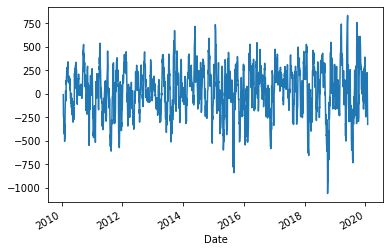

In [19]:

data['Seasonal First Difference'].plot()

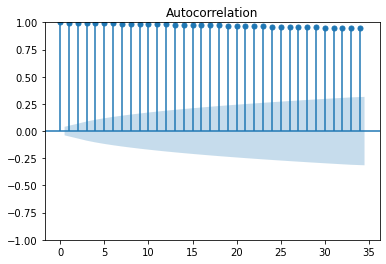

In [20]:
plot_acf(data['Adj Close'])
plt.show()


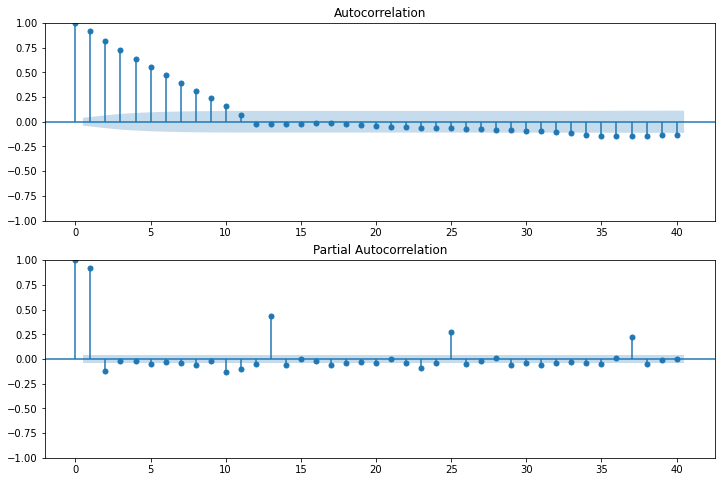

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

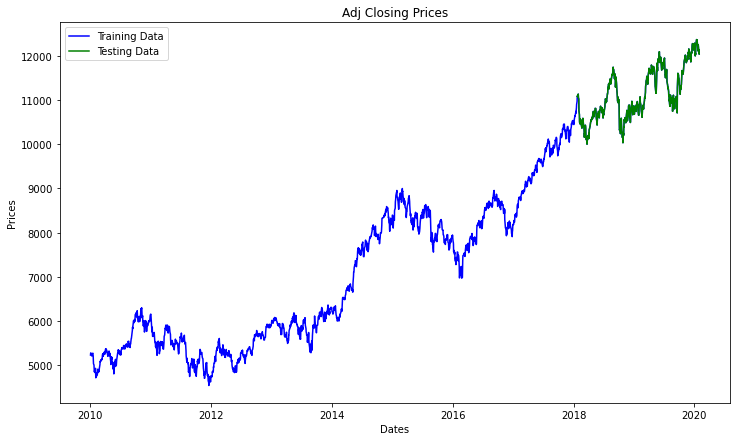

In [22]:

train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Adj Closing Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.legend()

In [23]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)


<class 'list'>
Testing Mean Squared Error: 8830.658
Symmetric mean absolute percentage error: 0.649


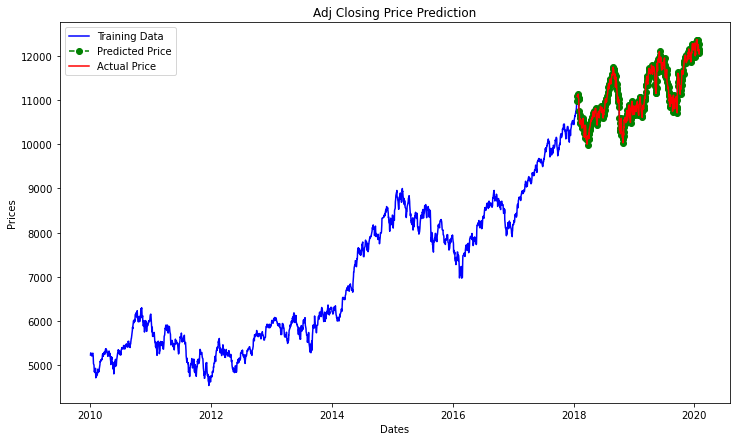

In [24]:
plt.figure(figsize=(12,7))
plt.plot(data['Adj Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Actual Price')
plt.title('Adj Closing Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()